# NVE

## Phase Space, Liuville's Theorem and Ergoicity ideas

Conservative systems are govenred by Hamilton's equation of motion. That is changes in position and momenta stay on the surface: $H(p,q)=E$

$$\dot{q} = \frac{\partial H}{\partial p}$$

$$\dot{p} = -\frac{\partial H}{\partial q}$$

To see how ensemble N body mechanical conervative system evoleves we are introducing probability distribution of classical trajecotires in phase space

$$\rho(p,q,t)dq dp $$

### Continuity equation and Liuville's theorem

$$\frac{\partial \rho(p,q,t)}{\partial t} = -\nabla J = - \nabla(\rho \vec{v})$$

Where flux $J= \rho \vec{v}$ is defined in terms of the velcotiy of points in phase space $v = (\dot{q},\dot{p})$. Combinging the continuity expression combined with Hamilton's equation of motion:

$$\dot{p_i} = -\partial_{q_i} H \,\,\,\,\ \dot{q_i} = \partial_{p_i} H$$



$$\frac{\partial \rho(p,q,t)}{\partial t} + \sum_i \Big [ \frac{\partial \rho}{\partial q_i}\dot{q_i}+\frac{\partial \rho}{\partial p_i} \dot{p_i} \Big] + \rho \sum_i \Big [ \frac{\partial \dot{q_i}}{\partial q_i}+  \frac{\partial \dot{p_i}}{\partial p_i}  \Big]=0$$ 

Where the last term is zero one we plug Hamilton's equation. We thus arrive at a crucial conclusion that the space volume is preserved during conservative dynamics 

$$\frac{\partial \rho(p,q,t)}{\partial t} + \sum_i \Big [ \frac{\partial \rho}{\partial q_i}\dot{q_i}+\frac{\partial \rho}{\partial p_i} \dot{p_i} \Big]=\frac{d \rho}{ dt} = 0$$ 

Furthermore we see that the time dependence of phase space probability density vanishes if it is a function of hamiltonian $\rho = f(H)$

$$\frac{\partial \rho}{\partial t} = \sum_i \Big [ \frac{\partial \rho}{\partial q_i}\cdot{q_i}+\frac{\partial \rho}{\partial p_i}\cdot{p_i} \Big] = -\{H,\rho \}$$

### Liuville theorem illustrated

According to Liuvile's theorem small phase space area element under time evolution gets deform but preserves the volume. For example, assume the initial distribution is a rectangle in phase space (x , v)  

$${x 0 − d x ≤ x ≤ x 0 + d x}$$  

$$ {v 0 − d v ≤ v ≤ v 0 + d v } $$

As time progresses this rectangle will deform, but its area will not change (assuming $d x$  and $d v$  are sufficiently small which ensure energy conservation)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci


Bad key text.latex.unicode in file /Users/potoyan/.matplotlib/stylelib/paper.mplstyle, line 2 ('text.latex.unicode   : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.unicode in file /Users/potoyan/.matplotlib/stylelib/paper2.mplstyle, line 2 ('text.latex.unicode   : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
from matplotlib.patches import Polygon # for making rectangles from four points

a = 1.0             # acceleration
x0, v0 = 0., 0.    # center of initial phase space element
dx, dv = 0.1, 0.1  # (half of) width of initial phase space element

p0 = np.array(((x0-dx,v0-dv),(x0-dx,v0+dv),(x0+dx,v0+dv),(x0+dx,v0-dv)))     # initial phase space element

def propagate(p0, t):
    
    """Propagates a phase space patch p0 for time t."""
    
    x0, v0 = p0.T
    x = x0 + v0*t + 0.5*a*t**2
    v = v0 + a*t
    
    return np.column_stack((x,v))

(-0.5, 3.5)

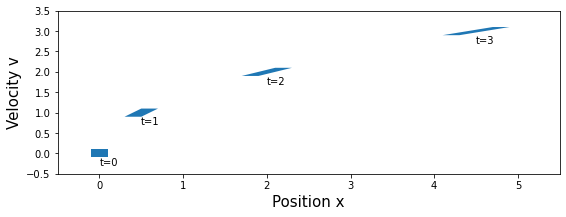

In [8]:
fig, ax = plt.subplots(figsize=(9,3))


for t in np.arange(4):
    
    p = propagate(p0,t)  

    x, y = np.mean(p,axis=0)
    ax.add_patch(Polygon(p))
    ax.text(x, y-0.3, f"t={t}")
    
ax.set_xlabel("Position x", fontsize=15)
ax.set_ylabel("Velocity v", fontsize=15)
ax.set_xlim(-0.5,5.5)
ax.set_ylim(-0.5,3.5)

### Hamiltonian, conservative dynamics in phase space

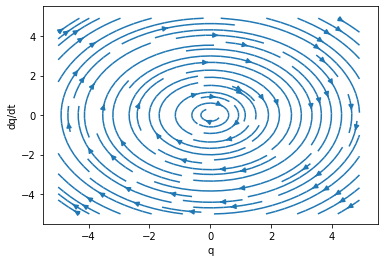

In [4]:
# range of x and y grid
xmax = 5
ymax = 5

# make a grid of x and y values, Y = dot X
X, Y = np.meshgrid(np.arange(-xmax,xmax,.1), np.arange(-ymax,ymax,.1) )

H = 0.5*Y*Y +0.5*X*X   #here is the Hamiltonian

#cs = plt.contour(X,Y,H,20,cmap='inferno')
#plt.clabel(cs,inline=1,fontsize=10)

plt.xlabel('q')
plt.ylabel('dq/dt')
plt.axis([-1.1*xmax, 1.1*xmax, -1.1*ymax, 1.1*ymax])

# Hamilton's equations define a vector field U,V
U =   Y
V = - X

Q = plt.streamplot(X,Y, U, V,density=1)

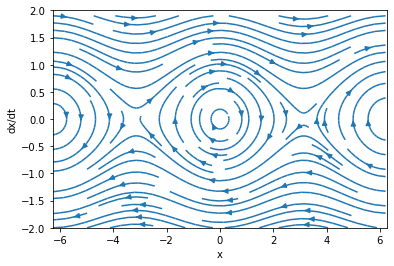

In [5]:
# range of x and y grid
xmax = np.pi*2.0
ymax = 2

# make a grid of x and y values, Y = dot X
X, Y = np.meshgrid(np.arange(-xmax,xmax,.1),np.arange(-ymax,ymax,.1) )

epsilon=0.3

H = 0.5*Y*Y  - epsilon*np.cos(X)    #here is the Hamiltonian

# Hamilton's equations define a vector field U,V
U = Y
V = -epsilon*np.sin(X)

#cs =plt.contour(X,Y,H,10,cmap='inferno')
#plt.clabel(cs,inline=1,fontsize=10)

plt.xlabel('x')
plt.ylabel('dx/dt')
plt.axis([-xmax, xmax, -ymax, ymax])



Q = plt.streamplot(X,Y, U, V,density=1) # plot the vector field 